In [1]:
import numpy as np
import scipy.spatial as spatial

In [2]:
#mean velocities of the system
v0 = 1

In [3]:
#number of particles
N = 100

In [4]:
#setting boundaries for the system
xlim,ylim = 1,1

In [5]:
#radius beyond which we cannot have more particles
r = 0.1

In [6]:
#let us define the time-steps
nn = 400
#time between each time step in second
dt = 0.1

In [7]:
#noise parameter 
eta = 0.2

In [8]:
#creating random coordinates for the points
import random
xcoord = [random.random()*xlim for i in range(N)]
ycoord = [random.random()*ylim for i in range(N)]

In [9]:
#creating random velocites to each of the particle
#we will geneate random theta and assign it to every particle
theta = [random.random()*2*np.pi for i in range(N)]
#Now we want to find the direction array
v0_cos_theta = [v0*np.cos(theta[i]) for i in range(N)]
v0_sin_theta = [v0*np.sin(theta[i]) for i in range(N)]

In [10]:
#Now let us form a dataframe and put the data in one place
import pandas as pd

In [11]:
d = {'X':xcoord,'Y':ycoord,'Vx':v0_cos_theta,'Vy':v0_sin_theta,'theta':theta}
df = pd.DataFrame(d)

In [12]:
#let us look at a summary of the created dataframe
df.head()

,X,Y,Vx,Vy,theta
0,0.722517,0.549535,0.859242,-0.511570,5.746175
1,0.133553,0.549509,0.972127,-0.234456,6.046527
2,0.762182,0.626394,-0.962231,0.272234,2.865879
3,0.350710,0.998844,0.961606,0.274433,0.278000
4,0.772268,0.484600,0.999587,0.028747,0.028751


In [13]:
#let us plot the data
import matplotlib.pyplot as plt

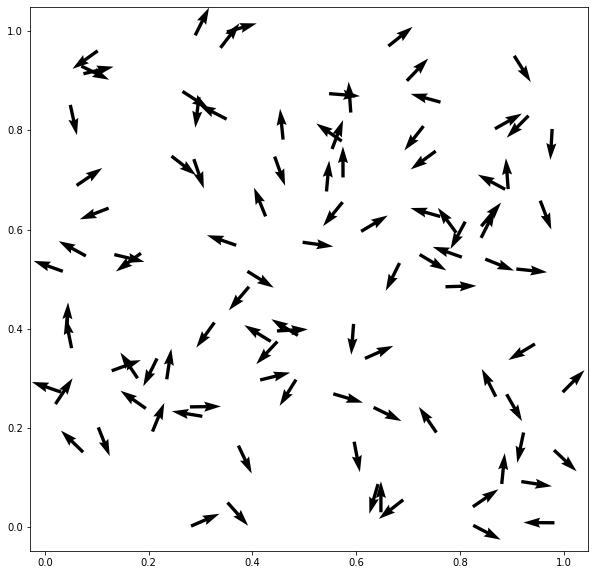

In [14]:
plt.figure(figsize=(10,10))
plt.quiver(df.X,df.Y,df.Vx,df.Vy)
plt.show()

In [15]:
#let us evaluate the order parameter
Vx = df.Vx.mean()
Vy = df.Vy.mean()
Va = np.sqrt(Vx**2+Vy**2)/v0
print(Va)

0.06915205508733363


In [16]:
#now we want to create a loop that will update values of position 
# velocites and other parameters based on simple rules of the vicsek
#model

In [17]:
for i in range(nn):
    df2 = df.copy(deep=True)
    df2.X = df.X + df.Vx*dt
    df2.Y = df.Y + df.Vy*dt
    #Applying Periodic Boundary conditions
    df2.X = df2.X%xlim
    df2.Y = df2.Y%ylim

    #Now let us update the mean value of theta using KDTree
    XY = df[['X','Y']].to_numpy()
    #let us construct the tree
    XY_tree = spatial.cKDTree(XY)
    for k in range(N):
        a = XY_tree.query_ball_point(XY[k],r=r)
        theta_ = 0
        for j in range(len(a)):
            theta_ += df.theta[a[j]]
        df2.theta[i]=theta_/len(a) + eta*random.uniform(-np.pi,np.pi)
    df2.Vx = v0*np.cos(df2.theta)
    df2.Vy = v0*np.sin(df2.theta)
    df = df2.copy(deep=True)

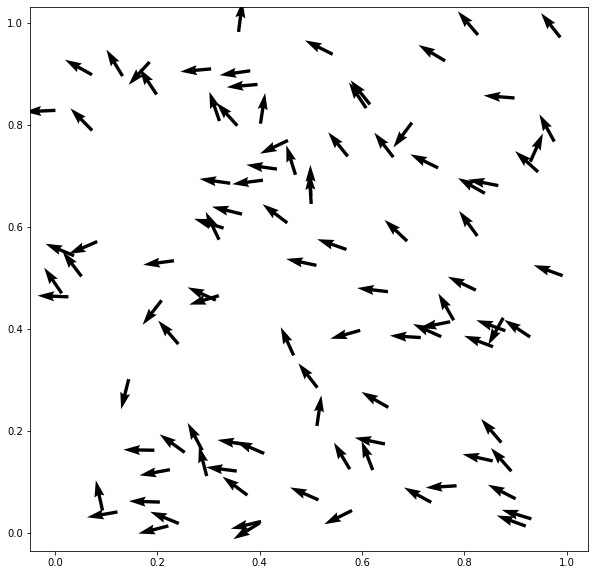

In [18]:
#let us plot after the time-step intervals
plt.figure(figsize=(10,10))
plt.quiver(df.X,df.Y,df.Vx,df.Vy)
plt.show()

In [19]:
#let us evaluate the order parameter
Vx = df.Vx.mean()
Vy = df.Vy.mean()
Va = np.sqrt(Vx**2+Vy**2)/v0

In [20]:
#the order parameter
Va

0.8169592073380081